In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
train = pd.read_csv("../../data/train.csv", index_col='PassengerId' )
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("../../data/test.csv", index_col='PassengerId' )
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# train, test 데이터 합치기

In [4]:
data = pd.concat([train, test], axis = 0, )
data

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262


# 각 컬럼별로 nan 값이 얼마나 있는 확인

In [5]:
data.isna().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

# < data 전처리 >

## 'Sex' 컬럼은 nan 값이 없으므로 LabelEncoder()로 전처리 한다.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Sex'] # male -> 1, female -> 0

PassengerId
1       1
2       0
3       0
4       0
5       1
       ..
1305    1
1306    0
1307    1
1308    1
1309    1
Name: Sex, Length: 1309, dtype: int32

## Name 컬럼은 nan 값이 없으므로 전처리 한다.

In [7]:
data['Name'] = le.fit_transform(data['Name'])
data['Name']

PassengerId
1        155
2        286
3        523
4        422
5         22
        ... 
1305    1126
1306     891
1307    1046
1308    1227
1309     953
Name: Name, Length: 1309, dtype: int32

## Cabin은 nan 값이 1014개이므로 fillna() 함수로 0으로 채워준다.

## 객실 배정 받은 사람은 1, 아닌 사람은 0으로 한다.

In [8]:
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
data['Cabin']

PassengerId
1       0
2       1
3       0
4       1
5       0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Cabin, Length: 1309, dtype: int64

## Embarked 전처리

In [9]:
data.loc[data['Embarked'].isna(),:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,1,NaN,80.0,571,0,1,0,0,1.0,113572
830,62.0,1,NaN,80.0,1145,0,1,0,0,1.0,113572


In [10]:
data.loc[data.index==62,'Embarked']='S'
data.loc[data.index==830,'Embarked']='S'
data.loc[data['Embarked'].isna(),:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [11]:
data['Embarked'] = data['Embarked'].map({'S':3,"C":2,"Q":1})
data['Embarked']

PassengerId
1       3
2       2
3       3
4       3
5       3
       ..
1305    3
1306    2
1307    3
1308    3
1309    2
Name: Embarked, Length: 1309, dtype: int64

## Ticket 전처리

In [12]:
data['Ticket'] = le.fit_transform(data['Ticket'])
data['Ticket']

PassengerId
1       720
2       816
3       914
4        65
5       649
       ... 
1305    711
1306    834
1307    872
1308    579
1309    262
Name: Ticket, Length: 1309, dtype: int32

# test set에는 'Survived' 정보가 없으므로 
# Pclass와 Sex로 자료를 나눈다.

### male & Pclass & age.notnull()

In [13]:
m1 = data.loc[(data['Pclass']==1) & (data['Sex'] == 1) & (data['Age'].notnull()),:]
m1 # 남자이면서 1등급인 사람들

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
7,54.0,1,3,51.8625,767,0,1,1,0,0.0,109
24,28.0,1,3,35.5000,1111,0,1,1,0,1.0,54
28,19.0,1,3,263.0000,404,2,1,1,3,0.0,123
31,40.0,0,2,27.7208,1205,0,1,1,0,0.0,818
35,28.0,0,2,82.1708,793,0,1,1,1,0.0,820
...,...,...,...,...,...,...,...,...,...,...,...
1270,55.0,1,3,50.0000,539,0,1,1,0,NaN,685
1282,23.0,1,3,93.5000,934,0,1,1,0,NaN,86
1295,17.0,0,3,47.1000,206,0,1,1,0,NaN,35


In [14]:
m2 = data.loc[(data['Pclass']==2) & (data['Sex'] == 1) & (data['Age'].notnull()),:]
m2

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
21,35.0,0,3,26.0000,423,0,2,1,0,0.0,182
22,34.0,1,3,13.0000,112,0,2,1,0,1.0,203
34,66.0,0,3,10.5000,1251,0,2,1,0,0.0,751
71,32.0,0,3,10.5000,587,0,2,1,0,0.0,762
73,21.0,0,3,73.5000,558,0,2,1,0,0.0,847
...,...,...,...,...,...,...,...,...,...,...,...
1279,57.0,0,3,13.0000,55,0,2,1,0,NaN,195
1285,47.0,0,3,10.5000,437,0,2,1,0,NaN,757
1293,38.0,0,3,21.0000,424,0,2,1,1,NaN,313


In [15]:
m3 = data.loc[(data['Pclass']==3) & (data['Sex'] == 1) & (data['Age'].notnull()),:]
m3

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,0,3,7.2500,155,0,3,1,1,0.0,720
5,35.0,0,3,8.0500,22,0,3,1,0,0.0,649
8,2.0,0,3,21.0750,914,1,3,1,3,0.0,541
13,20.0,0,3,8.0500,1070,0,3,1,0,0.0,733
14,39.0,0,3,31.2750,38,5,3,1,1,0.0,459
...,...,...,...,...,...,...,...,...,...,...,...
1286,29.0,0,3,22.0250,654,1,3,1,3,NaN,365
1288,24.0,0,1,7.2500,246,0,3,1,0,NaN,645
1290,22.0,0,3,7.7750,683,0,3,1,0,NaN,442


### female & Pclass & age.notnull()

In [16]:
f1 = data.loc[(data['Pclass'] == 1) & (data['Sex'] == 0) & (data['Age'].notnull()),:]
f1

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
2,38.0,1,2,71.2833,286,0,1,0,1,1.0,816
4,35.0,1,3,53.1000,422,0,1,0,1,1.0,65
12,58.0,1,3,26.5500,133,0,1,0,0,1.0,50
53,49.0,1,2,76.7292,500,0,1,0,1,1.0,803
62,38.0,1,3,80.0000,571,0,1,0,0,1.0,42
...,...,...,...,...,...,...,...,...,...,...,...
1289,48.0,1,2,79.2000,417,1,1,0,1,NaN,96
1292,30.0,1,3,164.8667,132,0,1,0,0,NaN,626
1294,22.0,0,2,59.4000,434,1,1,0,0,NaN,23


In [17]:
f2 = data.loc[(data['Pclass']==2) & (data['Sex']== 0) & (data['Age'].notnull()),:]
f2

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
10,14.0,0,2,30.0708,847,0,2,0,1,1.0,174
16,55.0,0,3,16.0000,533,0,2,0,0,1.0,204
42,27.0,0,3,21.0000,1204,0,2,0,1,0.0,69
44,3.0,0,2,41.5792,678,2,2,0,1,1.0,868
54,29.0,0,3,26.0000,381,0,2,0,1,1.0,324
...,...,...,...,...,...,...,...,...,...,...,...
1222,48.0,0,3,36.7500,310,2,2,0,0,NaN,763
1241,31.0,0,3,21.0000,1224,0,2,0,0,NaN,781
1253,24.0,0,2,37.0042,749,1,2,0,1,NaN,841


In [18]:
f3 = data.loc[(data['Pclass']==3) & (data['Sex']== 0) & (data['Age'].notnull()),:]
f3

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
3,26.0,0,3,7.9250,523,0,3,0,0,1.0,914
9,27.0,0,3,11.1333,605,2,3,0,0,1.0,477
11,4.0,1,3,16.7000,1067,1,3,0,1,1.0,839
15,14.0,0,3,7.8542,1221,0,3,0,0,0.0,566
19,31.0,0,3,18.0000,1217,0,3,0,1,0.0,417
...,...,...,...,...,...,...,...,...,...,...,...
1259,22.0,0,3,39.6875,1003,0,3,0,0,NaN,335
1268,22.0,0,3,8.6625,651,0,3,0,2,NaN,364
1275,19.0,0,3,16.1000,783,0,3,0,1,NaN,655


# Age 전처리
# Pclass와 Sex에 따라서 'Age' median 값을 준다.

In [19]:
data.loc[(data['Pclass'] == 1 ) & (data['Sex'] == 1 ) & (data['Age'].isnull()),'Age'] = m1['Age'].median()
data.loc[(data['Pclass'] == 2 ) & (data['Sex'] == 1 ) & (data['Age'].isnull()),'Age'] = m2['Age'].median()
data.loc[(data['Pclass'] == 3 ) & (data['Sex'] == 1 ) & (data['Age'].isnull()),'Age'] = m3['Age'].median()

In [20]:
data.loc[(data['Pclass'] == 1 ) & (data['Sex'] == 0 ) & (data['Age'].isnull()),'Age'] = f1['Age'].median()
data.loc[(data['Pclass'] == 2 ) & (data['Sex'] == 0 ) & (data['Age'].isnull()),'Age'] = f2['Age'].median()
data.loc[(data['Pclass'] == 3 ) & (data['Sex'] == 0 ) & (data['Age'].isnull()),'Age'] = f3['Age'].median()

In [21]:
data.isna().sum()

Age           0
Cabin         0
Embarked      0
Fare          1
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
Ticket        0
dtype: int64

In [22]:
data.loc[data['Fare'].isnull(),:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,0,3,NaN,1146,0,3,1,0,NaN,631


In [23]:
data.loc[data.index == 1044,'Fare'] = m3['Fare'].median()

In [24]:
data.loc[data['Fare'].isnull(),:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [25]:
data.isna().sum()

Age           0
Cabin         0
Embarked      0
Fare          0
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
Ticket        0
dtype: int64

In [26]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,0,3,7.2500,155,0,3,1,1,0.0,720
2,38.0,1,2,71.2833,286,0,1,0,1,1.0,816
3,26.0,0,3,7.9250,523,0,3,0,0,1.0,914
4,35.0,1,3,53.1000,422,0,1,0,1,1.0,65
5,35.0,0,3,8.0500,22,0,3,1,0,0.0,649
...,...,...,...,...,...,...,...,...,...,...,...
1305,25.0,0,3,8.0500,1126,0,3,1,0,NaN,711
1306,39.0,1,2,108.9000,891,0,1,0,0,NaN,834
1307,38.5,0,3,7.2500,1046,0,3,1,0,NaN,872


# x, y, test 자료 나누기

In [27]:
x=data.loc[:891,:].drop(['Survived'],axis=1)
x

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
1,22.0,0,3,7.2500,155,0,3,1,1,720
2,38.0,1,2,71.2833,286,0,1,0,1,816
3,26.0,0,3,7.9250,523,0,3,0,0,914
4,35.0,1,3,53.1000,422,0,1,0,1,65
5,35.0,0,3,8.0500,22,0,3,1,0,649
...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,3,13.0000,811,0,2,1,0,130
888,19.0,1,3,30.0000,464,0,1,0,0,18
889,22.0,0,3,23.4500,607,2,3,0,1,923


In [28]:
test_x=data.loc[892:,:].drop(['Survived'],axis=1)
test_x

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
892,34.5,0,1,7.8292,638,0,3,1,0,376
893,47.0,0,3,7.0000,1266,0,3,0,1,582
894,62.0,0,1,9.6875,837,0,2,1,0,184
895,27.0,0,3,8.6625,1278,0,3,1,0,366
896,22.0,0,3,12.2875,543,1,3,0,1,338
...,...,...,...,...,...,...,...,...,...,...
1305,25.0,0,3,8.0500,1126,0,3,1,0,711
1306,39.0,1,2,108.9000,891,0,1,0,0,834
1307,38.5,0,3,7.2500,1046,0,3,1,0,872


In [29]:
y=train['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# x, test 값 StandardScaler로 표준화

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.53923227, -0.54492498,  0.56883712, ...,  0.73769513,
         0.43279337,  0.93143334],
       [ 0.66103179,  1.835115  , -1.00518113, ..., -1.35557354,
         0.43279337,  1.27816704],
       [-0.23916625, -0.54492498,  0.56883712, ..., -1.35557354,
        -0.4745452 ,  1.63212435],
       ...,
       [-0.53923227, -0.54492498,  0.56883712, ..., -1.35557354,
         0.43279337,  1.66463064],
       [-0.23916625,  1.835115  , -1.00518113, ...,  0.73769513,
        -0.4745452 , -1.62933949],
       [ 0.21093277, -0.54492498, -2.57919938, ...,  0.73769513,
        -0.4745452 ,  0.64971221]])

In [32]:
test_s = scaler.fit_transform(test_x)
test_s

array([[ 0.39221514, -0.52752958, -2.24316522, ...,  0.75592895,
        -0.49947002, -0.3241601 ],
       [ 1.35682994, -0.52752958,  0.6778412 , ..., -1.32287566,
         0.61699237,  0.41088962],
       [ 2.51436769, -0.52752958, -2.24316522, ...,  0.75592895,
        -0.49947002, -1.00925499],
       ...,
       [ 0.70089188, -0.52752958,  0.6778412 , ...,  0.75592895,
        -0.49947002,  1.44566835],
       [-0.3408921 , -0.52752958,  0.6778412 , ...,  0.75592895,
        -0.49947002,  0.40018501],
       [-0.3408921 , -0.52752958, -0.78266201, ...,  0.75592895,
         0.61699237, -0.73093519]])

# x 값 train, test set 나누기

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=42,
                                                    test_size=.2)

In [34]:
print(f'x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

x_train: (712, 10)
x_test: (179, 10)

y_train: (712,)
y_test: (179,)


# Build a CNN model only Dense

In [35]:
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


In [36]:
model = Sequential()

In [37]:
model.add(Dense(20,
                input_dim=x_train.shape[1],
                activation='relu'))

In [38]:
model.add(Dense(10,
                activation='relu'))

In [39]:
model.add(Dense(5,
                activation='relu'))

In [40]:
model.add(Dense(1,
                activation='sigmoid'))

# Compile the model

In [41]:
model.compile(loss='binary_crossentropy',  # categorical_crossentropy
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Fit the model

In [42]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test,y_test))




Train on 712 samples, validate on 179 samples
Epoch 1/100





712/712 [==============================] - 1s 1ms/step - loss: 0.6832 - acc: 0.5744 - val_loss: 0.6727 - val_acc: 0.5642
Epoch 2/100
712/712 [==============================] - 0s 93us/step - loss: 0.6543 - acc: 0.6573 - val_loss: 0.6459 - val_acc: 0.6145
Epoch 3/100
712/712 [==============================] - 0s 93us/step - loss: 0.6235 - acc: 0.6713 - val_loss: 0.6175 - val_acc: 0.6480
Epoch 4/100
712/712 [==============================] - 0s 93us/step - loss: 0.5918 - acc: 0.6798 - val_loss: 0.5895 - val_acc: 0.6536
Epoch 5/100
712/712 [==============================] - 0s 74us/step - loss: 0.5614 - acc: 0.7051 - val_loss: 0.5649 - val_acc: 0.6872
Epoch 6/100
712/712 [==============================] - 0s 69us/step - loss: 0.5381 - acc: 0.7402 - val_loss: 0.5433 - val_acc: 0.7207
Epoch 7/100
712/712 [==============================] - 0s 74us/step - loss: 0.5170 - acc: 0.7683 - val_loss: 0.5219 - val_acc: 0.7430
Epoch 8/1

Epoch 50/100
712/712 [==============================] - 0s 77us/step - loss: 0.3633 - acc: 0.8497 - val_loss: 0.4168 - val_acc: 0.8156
Epoch 51/100
712/712 [==============================] - 0s 60us/step - loss: 0.3632 - acc: 0.8455 - val_loss: 0.4163 - val_acc: 0.8268
Epoch 52/100
712/712 [==============================] - 0s 63us/step - loss: 0.3620 - acc: 0.8427 - val_loss: 0.4192 - val_acc: 0.8101
Epoch 53/100
712/712 [==============================] - 0s 63us/step - loss: 0.3599 - acc: 0.8497 - val_loss: 0.4147 - val_acc: 0.8212
Epoch 54/100
712/712 [==============================] - 0s 73us/step - loss: 0.3604 - acc: 0.8511 - val_loss: 0.4155 - val_acc: 0.8101
Epoch 55/100
712/712 [==============================] - 0s 72us/step - loss: 0.3596 - acc: 0.8455 - val_loss: 0.4177 - val_acc: 0.8101
Epoch 56/100
712/712 [==============================] - 0s 77us/step - loss: 0.3572 - acc: 0.8427 - val_loss: 0.4173 - val_acc: 0.8156
Epoch 57/100
712/712 [==============================] -

# Prediction

In [43]:
y_pred = model.predict_classes(test_s)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [44]:
y_sub = pd.DataFrame(y_pred)
y_sub 

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


# Evaluation

In [45]:
mod_name = model.metrics_names
mod_name

['loss', 'acc']

In [46]:
score = model.evaluate(x_test, y_test)
score

179/179 [==============================] - 0s 39us/step


[0.4520916402672922, 0.8156424571015981]

In [47]:
print(f'{mod_name[0]}: {score[0]}\n{mod_name[1]}: {score[1]}')

loss: 0.4520916402672922
acc: 0.8156424571015981


# Graph

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

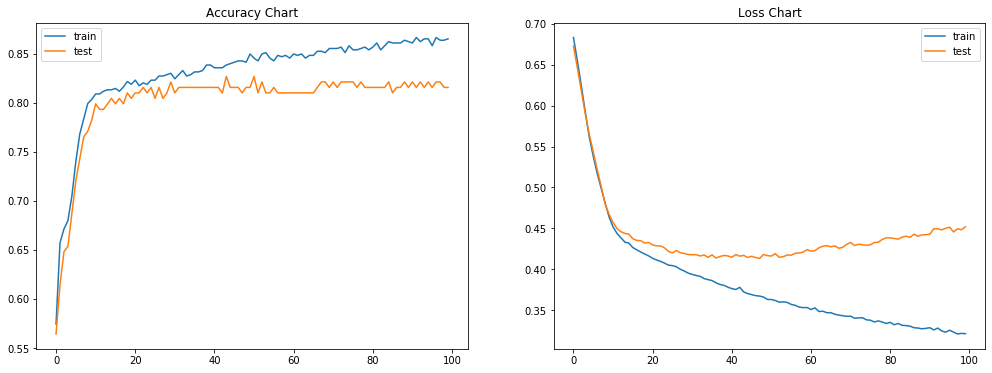

In [49]:
fig, ax = plt.subplots(1,2,figsize=(17,6))
ax = ax.ravel()

ax[0].set_title('Accuracy Chart')
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='test')
ax[0].legend(loc='best')

ax[1].set_title('Loss Chart')
ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')
ax[1].legend(loc='best')

plt.show()

In [50]:
submission = pd.DataFrame({"PassengerId": test.index,
                           "Survived": y_sub[0]})
submission.to_csv('../../data/submission.csv', index=False)